<a href="https://colab.research.google.com/github/daniui/Machine-Learning-Project/blob/main/Analisis%20Data%20Tidak%20Terstruktur/Hilmy_Rahmadani_Sentiment_STY_2206810490.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hilmy Rahmadani / 2206810490**

https://www.kaggle.com/code/pajarbebek/analisis-sentimen-timnas-indonesia-di-era-sty/notebook

In [1]:
!pip install opendatasets

In [17]:
import numpy as np # linear algebra
import re, os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow as tf
import string
import matplotlib.pyplot as plt


from collections import Counter

import datetime
from datetime import datetime

import transformers
from transformers import BertTokenizer
import tensorflow_hub as hub


#420957f732fd2695734cb5feb1279013

In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/pajarbebek/analisis-sentimen-timnas-sepakbola-di-era-sty")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: danskuy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pajarbebek/analisis-sentimen-timnas-sepakbola-di-era-sty


In [7]:
df2 = pd.read_csv('/content/analisis-sentimen-timnas-sepakbola-di-era-sty/Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')
df2

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif
...,...,...
393,<username> <username> 3 tahun lalu indonesia m...,positif
394,\,positif
395,Naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan yang diperlukan untuk proses...,positif


kode dibawah adalah pengecekan duplikat dan penhapusan duplikat pada data, dapat dilihat yang awalnya ada 4 duplikat, setelah penghapusan menjadi 0

In [8]:
print('Missing value:')
print(df2.isnull().sum())

print('\n\nData duplikat:')
print(df2.duplicated().sum())

Missing value:
komentar    0
label       0
dtype: int64


Data duplikat:
4


In [12]:
df2.drop_duplicates(inplace=True)

In [13]:
print('\n\nData duplikat:')
print(df2.duplicated().sum())



Data duplikat:
0


In [14]:
df2

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif
...,...,...
393,<username> <username> 3 tahun lalu indonesia m...,positif
394,\,positif
395,Naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan yang diperlukan untuk proses...,positif


mengubah semua huruf kapital menjadi hurus kecil biasa pada data kolom komentar

In [15]:
df2['komentar'] = df2['komentar'].str.lower()
df2

,komentar,label
0,<username> simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> belum tentu, ...",negatif
4,<username> <username> <username> lu nya aja yg...,negatif
...,...,...
393,<username> <username> 3 tahun lalu indonesia m...,positif
394,\,positif
395,naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan yang diperlukan untuk proses...,positif


menghapus tanda petik dua ' '

In [18]:
def remove_punctuation(words):
    return words.translate(str.maketrans('','',string.punctuation))
df2['komentar'] = df2['komentar'].apply(remove_punctuation)
df2

,komentar,label
0,username simulasi indonesia kembali dijajah ke...,negatif
1,username username username keturunan lain yang...,negatif
2,username username uda botak keturunan penjajah...,negatif
3,username username username belum tentu gak sem...,negatif
4,username username username lu nya aja yg bego ...,negatif
...,...,...
393,username username 3 tahun lalu indonesia meman...,positif
394,,positif
395,naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan yang diperlukan untuk proses...,positif


In [19]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Kode ini membersihkan teks dalam kolom 'komentar' pada DataFrame df2 dengan melakukan tokenisasi dan penghapusan stopword, lalu menggabungkannya kembali untuk analisis lebih lanjut (EDA)
*   Fungsi remove_stop_word: Menghapus kata dalam daftar stop_word dari daftar tokenized words
*   stop_word berisi kata-kata umum dalam bahasa Indonesia yang akan dihapus dari teks.

*   df2['komentar'].apply(word_tokenize) → Tokenisasi teks menjadi daftar kata.
*   df2['komentar'].apply(remove_stop_word) → Menghapus stopword dari daftar kata.


In [20]:
stop_word = [
    'yg',
    'yang',
    'di',
    'ini',
    'dan',
    'aja',
    'username',
    'itu',
    'ya'
]

def remove_stop_word(words):
    return [word for word in words if word not in stop_word]

df2['komentar'] = df2['komentar'].apply(word_tokenize)

df2['komentar'] = df2['komentar'].apply(remove_stop_word)

# Join lagi untuk melakukan EDA
df2['komentar'] = df2['komentar'].apply(' '.join)
df2

,komentar,label
0,simulasi indonesia kembali dijajah keturunan b...,negatif
1,keturunan lain gak main bola emang bisa natura...,negatif
2,uda botak keturunan penjajah sok si paling pah...,negatif
3,belum tentu gak semuanya jadi pemain bola mili...,negatif
4,lu nya bego makanya nonton sendiri tolol perse...,negatif
...,...,...
393,3 tahun lalu indonesia memang ga gencar buat n...,positif
394,,positif
395,naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan diperlukan untuk proses natu...,positif


In [22]:
X = df2['komentar']
y = df2['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,komentar
332,kebiasaan sty kalau ujicoba suka bapuk pas mai...
185,fans bola indonesia dari jaman dulu masih pole...
175,babak1 mana sih org2 ga setuju pemain belakang...
63,keknya sty gamau panggil pemain dr klub pemili...
345,gue plg benci sm akunâ€ bola indo mengandalka...
...,...
71,kita punya 7 forward masih ada dendy disana ra...
108,kalo gak bisa menang lawan vietnam mending sty...
273,setuju kalo mau menghakimi sty nanti piala asi...
352,kurangnya timnas masih perlu pemain naturalisa...


Kode ini melakukan tokenisasi teks menggunakan Tokenizer dari TensorFlow/Keras dengan batas maksimum 1.000 kata unik, lalu mengonversi teks menjadi urutan angka (sequences) untuk digunakan dalam model deep learning

In [23]:
max_kata = 1000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_kata)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_seq

[[388, 1, 82, 554, 83, 555, 69, 11, 885, 52, 886, 887],
 [237,
  4,
  17,
  13,
  197,
  106,
  9,
  888,
  130,
  3,
  70,
  33,
  131,
  556,
  3,
  13,
  889,
  6,
  28,
  890,
  107,
  891,
  557,
  132,
  3,
  558,
  18,
  892,
  174,
  7,
  153,
  389,
  304,
  130,
  3],
 [893,
  175,
  33,
  894,
  8,
  154,
  2,
  176,
  3,
  42,
  58,
  559,
  895,
  42,
  198,
  84,
  896,
  2,
  29,
  32,
  2,
  3,
  390,
  42,
  560,
  897,
  561,
  237,
  4,
  898],
 [391, 1, 899, 199, 2, 71, 96, 900, 901],
 [177,
  902,
  562,
  53,
  903,
  4,
  59,
  563,
  904,
  8,
  305,
  41,
  905,
  906,
  238,
  3,
  24,
  907,
  133,
  908,
  909,
  22,
  238,
  910],
 [58,
  911,
  564,
  178,
  239,
  1,
  34,
  912,
  306,
  108,
  72,
  392,
  35,
  913,
  565,
  566,
  155,
  914,
  200,
  393,
  85,
  915,
  916,
  917,
  566],
 [74, 394, 201, 3, 918],
 [567,
  240,
  919,
  42,
  108,
  395,
  396,
  36,
  241,
  97,
  16,
  920,
  397,
  109,
  921,
  307,
  156,
  568,
  60,
  398,
  6

In [24]:
panjang_sequences = [len(seq) for seq in X_train_seq]

median = np.median(panjang_sequences)

print("Median data training: ",median)

Median data training:  17.0



*   pad_sequences menyesuaikan panjang urutan numerik menjadi 20 kata.
Jika teks lebih pendek, akan ditambahkan padding (0) hingga mencapai panjang  yang diinginkan. Jika teks lebih panjang, akan dipotong hingga panjang maksimal.

*   padding='post', Padding ditambahkan di akhir (setelah teks), bukan di awal.



In [25]:
max_panjang = 20

X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_panjang, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_panjang, padding='post')
X_train_padded

array([[388,   1,  82, ...,   0,   0,   0],
       [ 13, 889,   6, ..., 304, 130,   3],
       [ 58, 559, 895, ..., 237,   4, 898],
       ...,
       [ 22,  25,   1, ...,   8,  28, 112],
       [ 27,  23, 332, ...,   2, 248,  10],
       [ 26,  94,  24, ...,  38, 105,   0]], dtype=int32)

In [26]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

Kode ini membangun dan mengompilasi model deep learning berbasis Bidirectional LSTM, menggunakan embedding layer, LSTM, dan dense layers, untuk klasifikasi biner menggunakan modul Keras

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_kata , output_dim=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    X_train_padded,
    y_train_encoded,
    epochs=30,
    batch_size=8,
    validation_data=(X_test_padded, y_test_encoded),
    verbose=2,
)
history

Epoch 1/30
40/40 - 6s - 155ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.6076 - val_loss: 0.6909
Epoch 2/30
40/40 - 2s - 46ms/step - accuracy: 0.6127 - loss: 0.6770 - val_accuracy: 0.6456 - val_loss: 0.6431
Epoch 3/30
40/40 - 1s - 17ms/step - accuracy: 0.6508 - loss: 0.6567 - val_accuracy: 0.7089 - val_loss: 0.6362
Epoch 4/30
40/40 - 1s - 31ms/step - accuracy: 0.7460 - loss: 0.5892 - val_accuracy: 0.7215 - val_loss: 0.6354
Epoch 5/30
40/40 - 1s - 17ms/step - accuracy: 0.8762 - loss: 0.3610 - val_accuracy: 0.6835 - val_loss: 0.6169
Epoch 6/30
40/40 - 1s - 17ms/step - accuracy: 0.9270 - loss: 0.2281 - val_accuracy: 0.6203 - val_loss: 1.2622
Epoch 7/30
40/40 - 1s - 32ms/step - accuracy: 0.9619 - loss: 0.1303 - val_accuracy: 0.6076 - val_loss: 1.0891
Epoch 8/30
40/40 - 1s - 32ms/step - accuracy: 0.9873 - loss: 0.0514 - val_accuracy: 0.5949 - val_loss: 1.3584
Epoch 9/30
40/40 - 1s - 17ms/step - accuracy: 0.9778 - loss: 0.0564 - val_accuracy: 0.5696 - val_loss: 1.5541
Epoch 10/

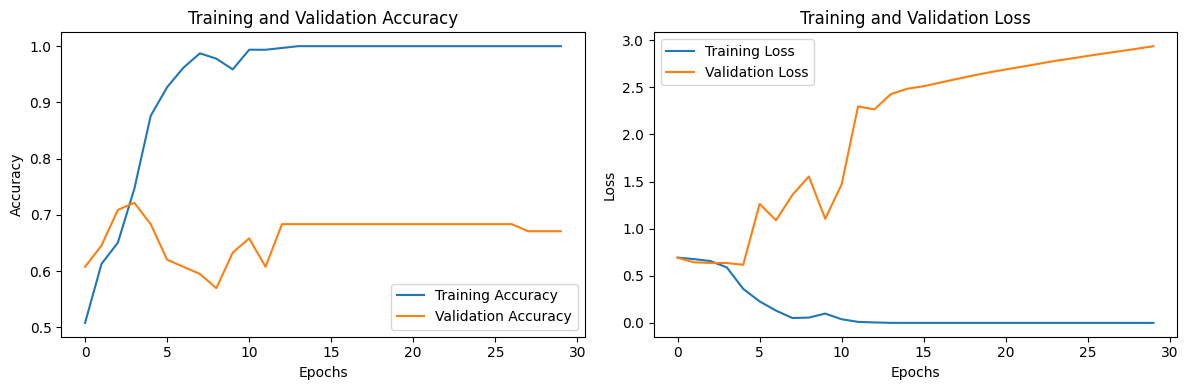

In [37]:
# Mendapatkan riwayat pelatihan
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#**KESIMPULAN**
- Didapat bahwa akurasi training mencapai 1, tetpai akurasi validasti hanya mencapai 0.7, selain itu loss validasi yang naik tetapi loss training yang turun. dua kriteria itu menandakan bahwa model yang dibangun mengalami overfitting pada proses pelatihan
